In [1]:
# import libraries
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
import scipy.stats as scp

# set plotting theme/style
sns.set(context='talk', style='white')

project_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CCP/HBN_study/Njenga_project/'
#project_dir = '/Users/sallynjenga/Library/CloudStorage/Box-Box/Njenga_project/'
out_dir = os.path.join(project_dir, 'DATA', 'processed_data')
raw_dir = os.path.join(project_dir, 'DATA', 'raw_data')
vid_dir = os.path.join(project_dir, 'DATA', 'video_data')
sample_file = os.path.join(project_dir, 'DATA', 'helper_files','sample_gord.32k_fs_LR.pscalar.nii')

vidfeat_of_interest = ['Positive','Negative','Brightness','SaliencyFract','Loudness']

## Compile Social Aptitude Scores

In [2]:
srs = pd.read_csv(os.path.join(raw_dir, '9994_SRS_20210322.csv'), 
                   header=0, skiprows=[1], index_col='EID').loc[:, ['SRS_AWR_T','SRS_COG_T','SRS_SCI_T']]
srs.columns = ['SRS_SocialAwareness','SRS_SocialCognition','SRS_SocialCommInteract']
srs.index = ['sub-{0}'.format(a) for a in srs.index]
srs.index.name = 'sub'

sample_info = pd.read_csv(os.path.join(raw_dir, 'sampleinfo_movieDM.csv'), index_col=0)
sample_info = sample_info.merge(srs, how='left', left_index=True, right_index=True)
sample_info = sample_info.drop_duplicates()

## Test if the correlation between default connectivity and each emotion predict social functioning

SRS_SocialAwareness and default-Positive: Spearman r=-0.03, p=0.534


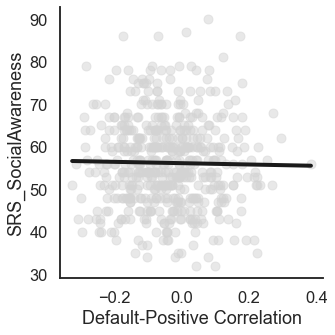

SRS_SocialAwareness and default-Negative: Spearman r=0.03, p=0.552


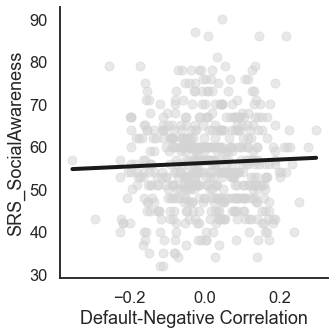

SRS_SocialCognition and default-Positive: Spearman r=-0.02, p=0.587


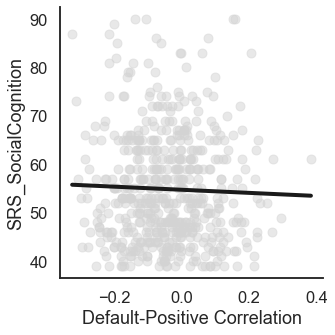

SRS_SocialCognition and default-Negative: Spearman r=0.06, p=0.197


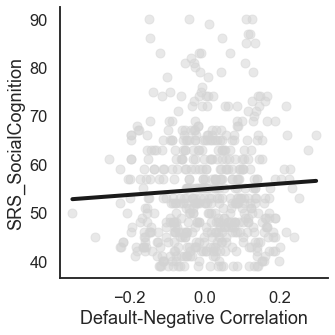

In [3]:
default_feat_corr = pd.read_csv(os.path.join(out_dir, 'real_default_feature_correlations_movieDM.csv'), index_col=0)
sample_info.loc[:,default_feat_corr.columns] = default_feat_corr.to_numpy()

for s in ['SRS_SocialAwareness','SRS_SocialCognition']:
    for f in ['Positive','Negative']:
        r,p = scp.spearmanr(sample_info[s],sample_info[f], nan_policy='omit')
        print('{0} and default-{1}: Spearman r={2}, p={3}'.format(s,f,round(r,2), round(p,3)))
        sns.lmplot(x=f,y=s, data=sample_info, ci=None, scatter_kws={'alpha':0.5, 'color':'lightgray'}, 
                   line_kws={'lw': 4, 'color':'k'})
        plt.xlabel('Default-{0} Correlation'.format(f))
        plt.ylabel(s)
        plt.tight_layout()
        plt.show()
        plt.close()